# Visualizations of data from project_code_FINAL.ipynb

### Table of contents ###

1.  [Initial setup](#1.-Initial-setup): importing necessary modules and pickles
2.  [Reminder of overall breakdown](#2.-Reminder-of-overall-breakdown): key overall stats from corpus
3.  ['Top 20' lists](#3.-'Top-20'-lists): predicting level_id in two ways
3.  [Machine Learning](#4.-Machine-Learning): predicting level_id in two ways
4.  [Plotting data](#5.-Plotting-data): creating visualizations of data from previous section

### 1. Initial setup ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pickle

#return every shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

cor_dir = "/Users/Benjamin's/Documents/Data_Science/bnaismith_LING2340_project/"

bigram_df = pd.read_pickle(cor_dir + 'bigram_df.pkl')
combo_df = pd.read_pickle(cor_dir + 'combo_df.pkl')
levels_df = pd.read_pickle(cor_dir + 'levels_df.pkl')

with open('MI_dict.pkl', 'rb') as handle:
    MI_dict = pickle.load(handle)

### 2. Reminder of overall breakdown

In [2]:
levels_df

,unigram_toks,unigram_types,bigram_toks,bigram_types,texts
Level 3,282844,11816,282843,81209,2698
Level 4,1193172,23231,1193171,236467,4509
Level 5,1060753,23667,1060752,236637,3749
Total,2549012,39016,2549011,430738,10956


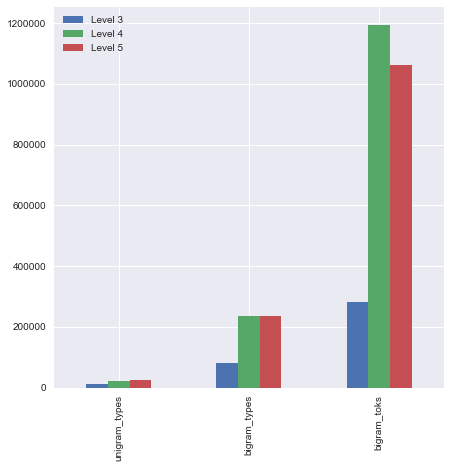

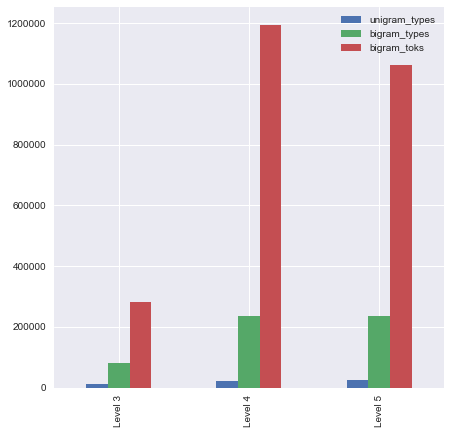

In [3]:
#bar graph of level data

plot = levels_df[['unigram_types','bigram_types','bigram_toks']].iloc[:3,:].T.plot(kind='bar', figsize=(7,7))
plot.figure

plot = levels_df[['unigram_types','bigram_types','bigram_toks']].iloc[:3,:].plot(kind='bar', figsize=(7,7))
plot.figure

### 3. 'Top 20' lists

Different 'Top 20' lists to get a feel for types of results each stat produces

In [4]:
#Starting with class tokens

top_bigram_toks = bigram_df.sort_values('tokens', ascending = False).reset_index(drop=True)
top_bigram_toks.index += 1 #lists look better starting at 1
top_bigram_toks.head(20)

#not very helpful - all punctuation and stop words

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
1,"[in, the]",11172,2.38,4382.88,2315,3654,5153,20.82,32.86,46.33,908.20,1433.50,2021.57
2,"[., the]",9865,0.77,3870.13,2103,3970,3690,21.57,40.71,37.85,825.03,1557.47,1447.62
3,"[,, and]",9818,1.71,3851.69,1969,4295,3545,20.07,43.79,36.14,772.46,1684.97,1390.74
4,"[of, the]",9054,2.03,3551.97,1675,3146,4206,18.55,34.86,46.59,657.12,1234.20,1650.05
5,"[., in]",8602,1.68,3374.64,1656,3325,3619,19.27,38.67,42.09,649.66,1304.43,1419.77
6,"[,, i]",8278,2.40,3247.53,2193,3222,2799,26.70,39.23,34.08,860.33,1264.02,1098.07
7,"[,, the]",8201,0.64,3217.33,1529,2854,3810,18.66,34.83,46.49,599.84,1119.65,1494.70
8,"[., i]",7442,2.11,2919.56,2185,2786,2271,30.19,38.50,31.39,857.20,1092.97,890.93
9,"[it, is]",6772,4.19,2656.72,1395,2548,2798,20.69,37.80,41.51,547.27,999.60,1097.68
10,"[., it]",5154,2.11,2021.96,1109,2100,1933,21.58,40.86,37.60,435.07,823.85,758.33


In [5]:
#Then the (presumably) more predictive MI

top_bigram_MI = bigram_df.sort_values('MI', ascending = False).reset_index(drop=True)
top_bigram_MI.index += 1
top_bigram_MI[top_bigram_MI['tokens'] >= 30].head(20) #set min number to get rid of random names and rarities

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
4949,"[los, angeles]",34,15.95,13.34,5,7,20,17.53,21.59,60.88,1.96,2.75,7.85
6097,"[hong, kong]",50,15.36,19.62,10,38,1,20.71,76.18,3.11,3.92,14.91,0.39
6485,"[undergrad, grill]",45,15.19,17.65,3,41,0,8.71,92.18,-0.89,1.18,16.08,0.00
6987,"[niagara, falls]",37,15.00,14.52,5,32,0,14.11,86.77,-0.89,1.96,12.55,0.00
6988,"[el, nino]",60,15.00,23.54,5,-4,59,8.71,-7.82,99.11,1.96,-1.57,23.15
7072,"[san, francisco]",45,14.96,17.65,3,24,16,8.71,54.40,36.89,1.18,9.42,6.28
7437,"[carbon, dioxide]",61,14.82,23.93,7,5,46,12.10,9.13,78.78,2.75,1.96,18.05
9741,"[southwestern, pennsylvania]",33,14.04,12.95,15,-1,0,108.71,-7.82,-0.89,5.88,-0.39,0.00
9747,"[frying, pan]",49,14.04,19.22,52,-2,0,106.67,-5.78,-0.89,20.40,-0.78,0.00
10794,"[alarm, clock]",47,13.73,18.44,41,-1,7,87.43,-3.57,16.14,16.08,-0.39,2.75


In [6]:
#but a lot of compound nouns, so maybe a 'medium' MI of 10 will have more collocations

top_bigram_MI.loc[(top_bigram_MI['tokens'] >= 30) & (top_bigram_MI['MI'] <= 10), :].head(20)

#seems like this is a useful approach but 'best' MI range needs exploring with human judgments

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
36882,"[unemployment, rate]",36,9.99,14.12,3,21,11,8.71,58.84,32.45,1.18,8.24,4.32
37302,"[south, korea]",196,9.95,76.89,20,28,145,10.76,14.74,74.50,7.85,10.98,56.88
38085,"[physical, activity]",93,9.90,36.48,10,54,28,10.86,58.84,30.30,3.92,21.18,10.98
38232,"[tea, bowl]",52,9.88,20.40,4,47,0,8.71,92.18,-0.89,1.57,18.44,0.00
38265,"[pay, attention]",117,9.88,45.90,23,55,37,19.82,47.73,32.45,9.02,21.58,14.52
38279,"[eating, habits]",147,9.88,57.67,12,97,36,8.71,66.33,24.96,4.71,38.05,14.12
38436,"[years, ago]",420,9.86,164.77,72,123,222,17.32,29.50,53.18,28.25,48.25,87.09
38914,"[public, transportation]",201,9.82,78.85,42,49,109,21.15,24.52,54.34,16.48,19.22,42.76
39100,"[wake, up]",113,9.79,44.33,35,44,32,31.72,39.08,29.20,13.73,17.26,12.55
39145,"[chinese, calendar]",37,9.79,14.52,3,34,0,8.71,92.18,-0.89,1.18,13.34,0.00


In [7]:
#The most frequent (normalized) tokens at each level
   
top_bigram_level3 = bigram_df.sort_values('lv3_norm_toks', ascending = False).reset_index(drop=True)
top_bigram_level3.index += 1
top_bigram_level3.head(10)

top_bigram_level4 = bigram_df.sort_values('lv4_norm_toks', ascending = False).reset_index(drop=True)
top_bigram_level4.index += 1
top_bigram_level4.head(10)

top_bigram_level5 = bigram_df.sort_values('lv5_norm_toks', ascending = False).reset_index(drop=True)
top_bigram_level5.index += 1
top_bigram_level5.head(10)

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
1,"[in, the]",11172,2.38,4382.88,2315,3654,5153,20.82,32.86,46.33,908.20,1433.50,2021.57
2,"[,, i]",8278,2.40,3247.53,2193,3222,2799,26.70,39.23,34.08,860.33,1264.02,1098.07
3,"[., i]",7442,2.11,2919.56,2185,2786,2271,30.19,38.50,31.39,857.20,1092.97,890.93
4,"[., the]",9865,0.77,3870.13,2103,3970,3690,21.57,40.71,37.85,825.03,1557.47,1447.62
5,"[,, and]",9818,1.71,3851.69,1969,4295,3545,20.07,43.79,36.14,772.46,1684.97,1390.74
6,"[of, the]",9054,2.03,3551.97,1675,3146,4206,18.55,34.86,46.59,657.12,1234.20,1650.05
7,"[., in]",8602,1.68,3374.64,1656,3325,3619,19.27,38.67,42.09,649.66,1304.43,1419.77
8,"[,, the]",8201,0.64,3217.33,1529,2854,3810,18.66,34.83,46.49,599.84,1119.65,1494.70
9,"[it, is]",6772,4.19,2656.72,1395,2548,2798,20.69,37.80,41.51,547.27,999.60,1097.68
10,"[there, are]",5083,5.99,1994.11,1193,2092,1770,23.60,41.39,35.01,468.02,820.71,694.39


,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
1,"[,, and]",9818,1.71,3851.69,1969,4295,3545,20.07,43.79,36.14,772.46,1684.97,1390.74
2,"[., the]",9865,0.77,3870.13,2103,3970,3690,21.57,40.71,37.85,825.03,1557.47,1447.62
3,"[in, the]",11172,2.38,4382.88,2315,3654,5153,20.82,32.86,46.33,908.20,1433.50,2021.57
4,"[., in]",8602,1.68,3374.64,1656,3325,3619,19.27,38.67,42.09,649.66,1304.43,1419.77
5,"[,, i]",8278,2.40,3247.53,2193,3222,2799,26.70,39.23,34.08,860.33,1264.02,1098.07
6,"[of, the]",9054,2.03,3551.97,1675,3146,4206,18.55,34.86,46.59,657.12,1234.20,1650.05
7,"[,, the]",8201,0.64,3217.33,1529,2854,3810,18.66,34.83,46.49,599.84,1119.65,1494.70
8,"[., i]",7442,2.11,2919.56,2185,2786,2271,30.19,38.50,31.39,857.20,1092.97,890.93
9,"[it, is]",6772,4.19,2656.72,1395,2548,2798,20.69,37.80,41.51,547.27,999.60,1097.68
10,"[,, you]",4668,2.01,1831.30,1127,2256,1283,24.15,48.35,27.50,442.13,885.05,503.33


,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
1,"[in, the]",11172,2.38,4382.88,2315,3654,5153,20.82,32.86,46.33,908.20,1433.50,2021.57
2,"[of, the]",9054,2.03,3551.97,1675,3146,4206,18.55,34.86,46.59,657.12,1234.20,1650.05
3,"[,, the]",8201,0.64,3217.33,1529,2854,3810,18.66,34.83,46.49,599.84,1119.65,1494.70
4,"[., the]",9865,0.77,3870.13,2103,3970,3690,21.57,40.71,37.85,825.03,1557.47,1447.62
5,"[., in]",8602,1.68,3374.64,1656,3325,3619,19.27,38.67,42.09,649.66,1304.43,1419.77
6,"[,, and]",9818,1.71,3851.69,1969,4295,3545,20.07,43.79,36.14,772.46,1684.97,1390.74
7,"[,, i]",8278,2.40,3247.53,2193,3222,2799,26.70,39.23,34.08,860.33,1264.02,1098.07
8,"[it, is]",6772,4.19,2656.72,1395,2548,2798,20.69,37.80,41.51,547.27,999.60,1097.68
9,"[., i]",7442,2.11,2919.56,2185,2786,2271,30.19,38.50,31.39,857.20,1092.97,890.93
10,"[to, the]",4573,0.60,1794.03,868,1624,2070,19.03,35.60,45.37,340.52,637.11,812.08


In [8]:
#And the bigrams most indicative of level (first strip % which became strings after unpickling)

bigram_df['lv3_rel_%'] = [str(x) for x in bigram_df['lv3_rel_%']]
bigram_df['lv3_rel_%'] = [(x.strip('%')) for x in bigram_df['lv3_rel_%']]
top_lv3_percent = bigram_df.sort_values('lv3_rel_%', ascending = False).reset_index(drop=True)
top_lv3_percent.index += 1
top_lv3_percent.loc[(top_lv3_percent['tokens'] >= 5) & (top_lv3_percent['MI'] >= 4), :].reset_index(drop=True).head(20) #minimum of 10 tokens and 4 MI

bigram_df['lv4_rel_%'] = [str(x) for x in bigram_df['lv4_rel_%']]
bigram_df['lv4_rel_%'] = [(x.strip('%')) for x in bigram_df['lv4_rel_%']]
top_lv4_percent = bigram_df.sort_values('lv4_rel_%', ascending = False).reset_index(drop=True)
top_lv4_percent.index += 1
top_lv4_percent.loc[(top_lv4_percent['tokens'] >= 5) & (top_lv4_percent['MI'] >= 4), :].reset_index(drop=True).head(20) #minimum of 10 tokens

bigram_df['lv5_rel_%'] = [str(x) for x in bigram_df['lv5_rel_%']]
bigram_df['lv5_rel_%'] = [(x.strip('%')) for x in bigram_df['lv5_rel_%']]
top_lv5_percent = bigram_df.sort_values('lv5_rel_%', ascending = False).reset_index(drop=True)
top_lv5_percent.index += 1
top_lv5_percent.loc[(top_lv5_percent['tokens'] >= 5) & (top_lv5_percent['MI'] >= 4), :].reset_index(drop=True).head(20) #minimum of 10 tokens

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
0,"[two, spaces]",22,8.48,8.63,21,0,0,99.62,1.27,-0.89,8.24,0.00,0.00
1,"[(, f]",18,6.06,7.06,10,0,0,99.62,1.27,-0.89,3.92,0.00,0.00
2,"[enjoy, reading]",11,5.16,4.32,10,0,0,99.62,-7.82,8.21,3.92,0.00,0.00
3,"[as, philadelphia]",38,6.25,14.91,10,0,0,99.62,-7.82,8.21,3.92,0.00,0.00
4,"[that, contributed]",32,5.78,12.55,31,0,0,99.33,-1.57,2.24,12.16,0.00,0.00
5,"[good, doctor]",40,5.44,15.69,39,0,0,98.71,2.18,-0.89,15.30,0.00,0.00
6,"[sony, 's]",10,5.66,3.92,9,0,0,98.71,-7.82,9.11,3.53,0.00,0.00
7,"[go, off]",30,5.49,11.77,29,-1,1,98.71,-4.49,5.78,11.38,-0.39,0.39
8,"[korean, national]",10,6.37,3.92,9,0,0,98.71,2.18,-0.89,3.53,0.00,0.00
9,"[probably, do]",20,4.33,7.85,19,0,0,98.71,-2.82,4.11,7.45,0.00,0.00


,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
0,"[convince, your]",10,5.54,3.92,0,9,0,8.71,92.18,-0.89,0.00,3.53,0.0
1,"[with, jim]",16,4.16,6.28,1,14,0,8.71,92.18,-0.89,0.39,5.49,0.0
2,"[your, lover]",13,6.18,5.10,1,11,0,8.71,92.18,-0.89,0.39,4.32,0.0
3,"[parents, disapprove]",6,9.30,2.35,0,5,0,8.71,92.18,-0.89,0.00,1.96,0.0
4,"[love, jim]",10,6.97,3.92,0,9,0,8.71,92.18,-0.89,0.00,3.53,0.0
5,"[sleep, environment]",9,4.90,3.53,0,8,0,8.71,92.18,-0.89,0.00,3.14,0.0
6,"[warm, milk]",9,8.20,3.53,0,8,0,8.71,92.18,-0.89,0.00,3.14,0.0
7,"[before, bedtime]",9,8.88,3.53,0,8,0,8.71,92.18,-0.89,0.00,3.14,0.0
8,"[do, housekeeping]",6,7.46,2.35,0,5,0,8.71,92.18,-0.89,0.00,1.96,0.0
9,"[dear, confused]",15,10.54,5.88,1,13,0,8.71,92.18,-0.89,0.39,5.10,0.0


,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,lv3_rel_%,lv4_rel_%,lv5_rel_%,lv3_per_M,lv4_per_M,lv5_per_M
0,"[taking, among]",6,5.57,2.35,0,0,5,8.71,-7.82,99.11,0.0,0.0,1.96
1,"[u.s., army]",5,6.50,1.96,0,0,4,8.71,-7.82,99.11,0.0,0.0,1.57
2,"[examination, system]",8,6.70,3.14,0,0,7,8.71,-7.82,99.11,0.0,0.0,2.75
3,"[final, examination]",9,9.27,3.53,0,0,8,8.71,-7.82,99.11,0.0,0.0,3.14
4,"[deliberate, intervention]",6,15.59,2.35,0,0,5,8.71,-7.82,99.11,0.0,0.0,1.96
5,"[express, intention]",6,11.29,2.35,0,0,5,8.71,-7.82,99.11,0.0,0.0,1.96
6,"[relieve, intractable]",6,15.61,2.35,0,0,5,8.71,-7.82,99.11,0.0,0.0,1.96
7,"[a, deliberate]",5,4.73,1.96,0,0,4,8.71,-7.82,99.11,0.0,0.0,1.57
8,"[math, teacher]",5,6.38,1.96,0,0,3,8.71,-7.82,99.11,0.0,0.0,1.18
9,"[fanthasia, '']",5,9.47,1.96,0,0,4,8.71,-7.82,99.11,0.0,0.0,1.57


#### The above tables seem to point to certain tasks rather than overall level

### 4. Machine Learning
- predict level_id based on
    - average bigram MI of a text (linear regression)
    - words used in a text ('bag-of-words' approach)
    

#### Average Bigram MI vs Level
    

In [9]:
X = combo_df[['avg_bigram_MI']]  #dataframe with only one column. Uppercase X. 
y = combo_df['level_id'] #series

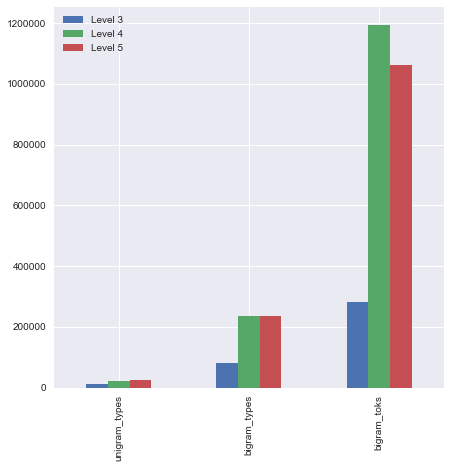

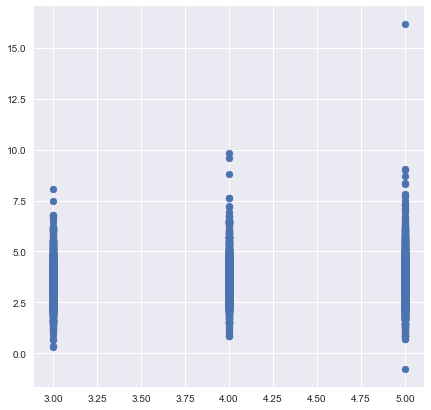

In [10]:
#Check to see if any obvious difference between average MI and level

plt.gcf().clear() #clear previous plots
plt.scatter(combo_df['level_id'], combo_df['avg_bigram_MI'])
plt.show()

#No need to run an ANOVA to see a lack of significance...

In [11]:
#split data with sklearn. Randomize on same seed. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [12]:
#Check lengths of X and y are equal

len(X_train)
len(X_test)
len(y_train)
len(y_test)

8764

2192

8764

2192

In [13]:
# Fitting Simple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)

In [15]:
X_test[:5]    # test set, real level id
y_test[:5]    # test set, average bigram MI
y_pred[:5]    # level id predicted by bigram MI
                 # <-- hopefully not too far away from real numbers! 

,avg_bigram_MI
answer_id,
34569,4.83
18087,4.78
45452,2.80
22548,2.48
26945,3.42


answer_id
34569    4
18087    5
45452    4
22548    3
26945    4
Name: level_id, dtype: int64

array([ 4.15404092,  4.15248246,  4.0907674 ,  4.08079325,  4.11009232])

In [16]:
#Not much difference between the different predicted results - everyone is level 4 according to this.

### 5. Plotting data
1. On training set
2. On test set

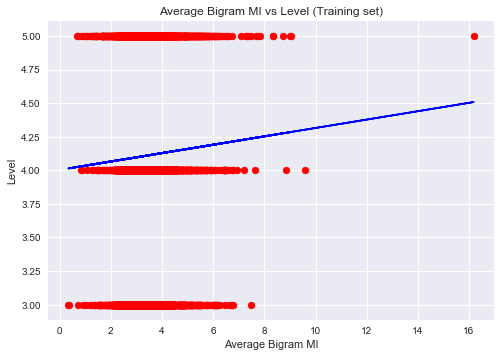

In [17]:
#Looking at linear regression to see if level can be predicted from average bigram MI

plt.gcf().clear() #clear previous plots
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Bigram MI vs Level (Training set)')
plt.xlabel('Average Bigram MI')
plt.ylabel('Level')
plt.show()

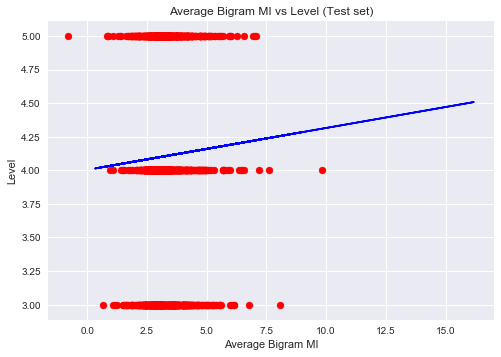

In [18]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Bigram MI vs Level (Test set)')
plt.xlabel('Average Bigram MI')
plt.ylabel('Level')
plt.show()

In [19]:
# How about someone with average MI of 3, 8, 15?
newdf = pd.DataFrame({'avg_MI':[3, 8, 15]})
newdf
regressor.predict(newdf)

,avg_MI
0,3
1,8
2,15


array([ 4.09700125,  4.25284736,  4.47103191])

Not at all successful - we would expect to see a step-like shape if higher levels did have higher average bigram MI scores. This may be due to an equal proportional increase in meaningful collocations as well as grammatical words as level increases.

#### Words (unigrams) used vs Level

This time seeing how well level can be predicted based on the words used at each level and Naive Bayes clustering

In [20]:
X = combo_df['text']
y = combo_df['level_id']

In [21]:
#split data with sklearn. Randomize on same seed. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [22]:
#check length of datasets

len(X_train)
len(X_test)
len(y_train)
len(y_test)

8764

2192

8764

2192

In [23]:
X_train.head()
y_train.head()

answer_id
3728     Prayer in Islam\r\r\r\n\r\r\r\n(ident)Prayer i...
2403     She gived in details the activities that she d...
40733    Since I like living in a big city, I am planni...
37913    The students in my engineering class could not...
1480     1.\tKung diet : in the northwestern part of th...
Name: text, dtype: object

answer_id
3728     5
2403     5
40733    5
37913    5
1480     4
Name: level_id, dtype: int64

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

plmodel = make_pipeline( TfidfVectorizer(max_features=1500, stop_words=None), MultinomialNB() )

plmodel.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1500, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [25]:
y_pred = plmodel.predict(X_test)

accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm

0.68932481751824815

array([[328, 191,  71],
       [ 53, 720, 115],
       [ 38, 213, 463]])

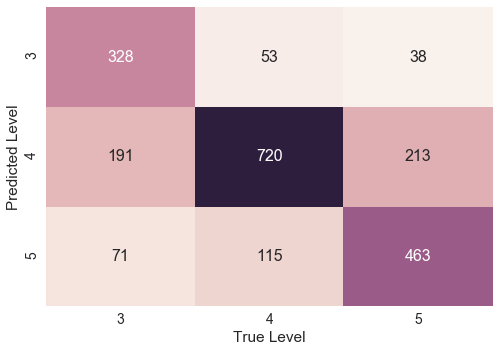

In [26]:
# confusion matrix is np.array(), and does not have label info.
# labels should be deduced unique values.  

plt.gcf().clear() #clear previous plots

labels = list(np.unique(y_test))  # already sorted

sns.set(font_scale=1.4) #for label size
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False, annot_kws={"size": 16},
            xticklabels=labels, yticklabels=labels)
plt.xlabel('True Level')
plt.ylabel('Predicted Level')
plt.show()

#### Pretty good accuracy at 69% although this may have to do with the lexical sets of the prompts. Interestingly, it somewhat underpredicts level 5 (thinking it's level 4).